# sentiment analysis using natural language processing and hybrid naive bayes classifier

In [3]:
# In the following project, dataset containing tweets made by general public on arts of British Museum have been selected
# to perform sentiment analysis on  emotions felt by the people after viewing the respective art
# of the museum . This will help the authorities to comprehend the general public view on the particular subject matter.


In [4]:
# For the following task, modules such as nltk, scikit learn , tweepy, pandas etc. have been used.
# Pathway of performing the task:-
# 1. load the related tweets fetched earlier in the form of csv
# 2. perform exploratory data analysis on the dataframe
#3. clean the texts of the tweets of any ambuiguty
#4. preprocess the data by removing stop words, tokenisation, lemmitization, vectorisation
# 5. split the data into trining and test sets
# 6. Apply naive bayes classifier
# 7. check the accuracy of the model 
# 8. check the model by providing new unknown tweets as inputs to the model

In [5]:
# import necessary modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import tweepy
import sklearn

In [6]:
import csv

In [7]:
# load the tweets in the form of a dataframe
smile = pd.read_csv('C:/Users/HP/Downloads/smileannotationsfinal (1).csv')
smile

,611857364396965889,@aandraous @britishmuseum @AndrewsAntonio Merci pour le partage! @openwinemap,nocode
0,614484565059596288,Dorian Gray with Rainbow Scarf #LoveWins (from...,happy
1,614746522043973632,@SelectShowcase @Tate_StIves ... Replace with ...,happy
2,614877582664835073,@Sofabsports thank you for following me back. ...,happy
3,611932373039644672,@britishmuseum @TudorHistory What a beautiful ...,happy
4,611570404268883969,@NationalGallery @ThePoldarkian I have always ...,happy
...,...,...,...
3079,613678555935973376,MT @AliHaggett: Looking forward to our public ...,happy
3080,613294681225621504,@britishmuseum Upper arm guard?,nocode
3081,615246897670922240,@MrStuchbery @britishmuseum Mesmerising.,happy
3082,613016084371914753,@NationalGallery The 2nd GENOCIDE against #Bia...,not-relevant


In [8]:
# checking basic information on the smile dataframe
smile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3084 entries, 0 to 3083
Data columns (total 3 columns):
 #   Column                                                                         Non-Null Count  Dtype 
---  ------                                                                         --------------  ----- 
 0   611857364396965889                                                             3084 non-null   int64 
 1   @aandraous @britishmuseum @AndrewsAntonio Merci pour le partage! @openwinemap  3084 non-null   object
 2   nocode                                                                         3084 non-null   object
dtypes: int64(1), object(2)
memory usage: 72.4+ KB


In [9]:
# since column names are named very strangely,changing column names to more convinient names
smile=smile.rename(columns={'611857364396965889':'user-id','@aandraous @britishmuseum @AndrewsAntonio Merci pour le partage! @openwinemap':'tweets',
                           'nocode':'sentiment'})


In [10]:
smile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3084 entries, 0 to 3083
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user-id    3084 non-null   int64 
 1   tweets     3084 non-null   object
 2   sentiment  3084 non-null   object
dtypes: int64(1), object(2)
memory usage: 72.4+ KB


In [11]:
#finding missing values in the dataframe
smile.isnull().sum()

user-id      0
tweets       0
sentiment    0
dtype: int64

In [12]:
#checking for duplicates
smile.duplicated().sum()

0

In [13]:
# removing special characters from the tweets column text
# the folowing expression is used to remove any special character from the tweets column
#which is other than alphabets, number 0 to 9 or white space

smile['tweets'] = smile['tweets'].replace(r'[^a-zA-Z0-9\s]', '', regex=True)


In [14]:
# visualising the sentiments in the dataset
viz_sentiment=smile[['sentiment']]
viz_sentiment.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3084 entries, 0 to 3083
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  3084 non-null   object
dtypes: object(1)
memory usage: 24.2+ KB


C:\Users\HP\AppData\Local\Temp\ipykernel_11040\3385257740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viz_sentiment['sentiment'] = viz_sentiment['sentiment'].astype('category')


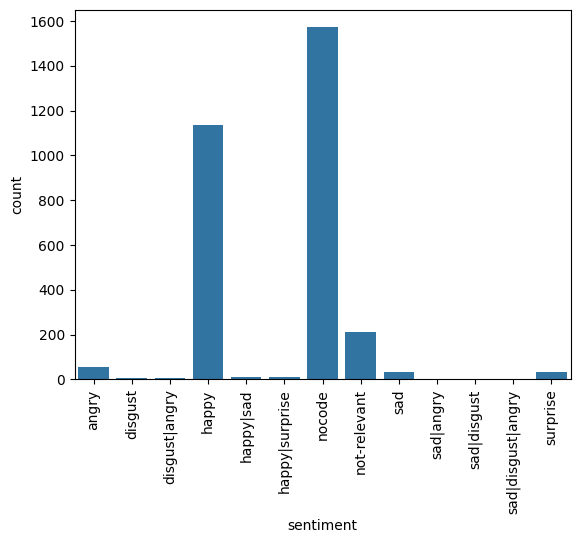

In [15]:
viz_sentiment['sentiment'] = viz_sentiment['sentiment'].astype('category')
sns.countplot(x='sentiment',data=viz_sentiment)
plt.xticks(rotation=90)
plt.show()

# many tweets are having nocode. other than that, major sentiments expressed by audience of the museum are happy, sad ,surprise, not-relevant and angry

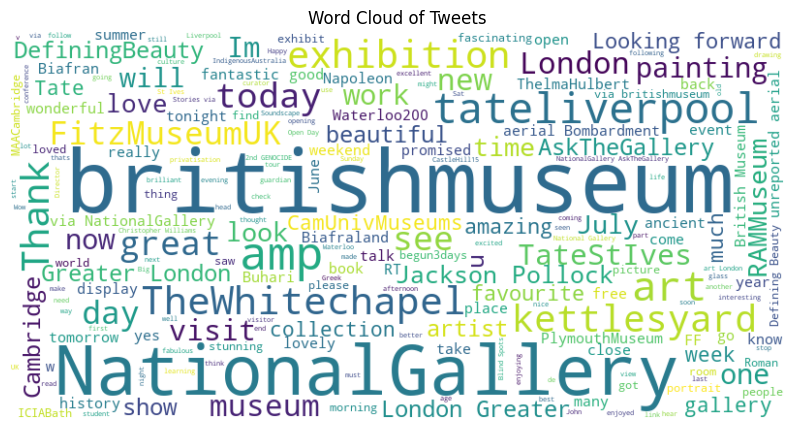

In [16]:
# lets make a word cloud of the available tweets to see the most common words appearing in the tweets
from wordcloud import WordCloud
# Combine all tweets into a single string
all_tweets_text = ' '.join(smile['tweets'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_tweets_text)
# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.title('Word Cloud of Tweets')
plt.show()

# sentiment analysis of the tweets


In [17]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
# Remove stopwords and tokenize the tweets
stop_words = set(stopwords.words('english'))


# now again performming sentiment analysis using naive bayes classifier


In [19]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [20]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
#create a user defined function named preprocess_tweet to  Preprocess the text data. 
#Remove stop words, tokenise and lemmatize the tweets one by one inside a user defined function
# after that, apply the fuction to our tweets column of the smile dataframe to create a new column named processedTweet


def preprocess_tweet(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tweet_tokens = word_tokenize(text.lower())  # Tokenization and lowercasing
    tweet_tokens = [lemmatizer.lemmatize(token) for token in tweet_tokens if token.isalnum()]  # Lemmatization
    tweet_tokens = [token for token in tweet_tokens if token not in stop_words]  # Remove stopwords
    return ' '.join(tweet_tokens)

smile['ProcessedTweet'] = smile['tweets'].apply(preprocess_tweet)

In [22]:
# top 5 rows of the smile dataframe
smile.head()

,user-id,tweets,sentiment,ProcessedTweet
0,614484565059596288,Dorian Gray with Rainbow Scarf LoveWins from b...,happy,dorian gray rainbow scarf lovewins britishmuse...
1,614746522043973632,SelectShowcase TateStIves Replace with your w...,happy,selectshowcase tatestives replace wish artist ...
2,614877582664835073,Sofabsports thank you for following me back Gr...,happy,sofabsports thank following back great hear di...
3,611932373039644672,britishmuseum TudorHistory What a beautiful je...,happy,britishmuseum tudorhistory beautiful jewel por...
4,611570404268883969,NationalGallery ThePoldarkian I have always lo...,happy,nationalgallery thepoldarkian always loved pai...


In [23]:
# Feature extraction 
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(smile['ProcessedTweet'])

# creating the target variable which will show the sentiments of each tweet
y = smile['sentiment']

In [24]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Train Naive Bayes classifier


classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [26]:
# Evaluate the classifier with different metrics
score = classifier.score(X_test,y_test)
print("accuracy of the naive bayes classifier is:", score)


accuracy of the naive bayes classifier is: 0.6726094003241491


In [27]:
# checking our model by providing new inputs
input_tweet = 'I loved visiting the museum'

input_tweet_preprocessed = preprocess_tweet(input_tweet)
input_tweet_vectorised = vectorizer.transform([input_tweet_preprocessed])
prediction = classifier.predict(input_tweet_vectorised)

# print the prediction
print(' sentiment of input tweet is: ' ,prediction[0])

 sentiment of input tweet is:  happy
